### Declare libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
pd.set_option("display.max_columns", 30)
import numpy as np
# librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
import os
from sklearn.model_selection import GridSearchCV, train_test_split,cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_pinball_loss
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import QuantileRegressor
from sklearn.svm import SVR
from xgboost import DMatrix,XGBRegressor, train

### Declare functions made by my own

In [2]:
# función creada por mi para traer los NA's
def get_na(df):
    qsna=df.shape[0]-df.isnull().sum(axis=0)
    qna=df.isnull().sum(axis=0)
    ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
    aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
    na=pd.DataFrame(data=aux)
    return na.sort_values(by='Na en %',ascending=False)

def train_metrics(X,y,n_cv, metrics, model):
    scores = cross_validate(model, X, y, scoring=metrics, cv=n_cv,return_train_score=False)
    # print scores
    #print('Mean train R2 of the training with cross validation: %.3f (%.3f)' % (scores['train_r2'].mean(), scores['train_r2'].std()) )
    print('Mean test R2 of the training with cross validation: %.3f (%.3f)' % (scores['test_r2'].mean(), scores['test_r2'].std()) )
    #print('Mean train MSE vof the training with cross validation: %.3f (%.3f)' % (scores['train_mse'].mean(), scores['train_mse'].std()) )
    print('Mean test MSE of the training with cross validation: %.3f (%.3f)' % (scores['test_mse'].mean(), scores['test_mse'].std()) )
    #print('Mean train MAE of the training with cross validation: %.3f (%.3f)' % (scores['train_mae'].mean(), scores['train_mae'].std()) )
    print('Mean test MAE of the training with cross validation: %.3f (%.3f)' % (scores['test_mae'].mean(), scores['test_mae'].std()) )
    # plot of train and test scores of the K-folds
    values = np.arange(1,n_cv+1)
    #plt.plot(values, scores['train_mae'], '-o', label='Train MAE of the training with cross validation')
    plt.plot(values, scores['test_mae'], '-o', label='Test MAE of the training with cross validation')
    plt.title('MSE of the training with cross validation in each k-fold')
    plt.legend()
    plt.show()
    return scores

def show_test_metrics(X_train,y_train,y_test,model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(regr.score(X_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
    error = abs(y_pred-y_test)
    print(error.describe())
    sns.scatterplot(y=y_test, x=y_pred,legend=True)
    return model,y_pred, error

### Load data and transform


The task done here where: 

* Set folder location of the data
* Load the data
* Select the variables that i am going to use
* Apply the drop of NA over the new dataset with the selected variables
* extract the target variables (total minutes) to variable y
* extract the explaining variables to variable X

In [3]:
# you need to change it if you are going to run it on your local machine, writing the folder where the raw data of the challenge is
os.chdir('/Users/iairlinker/Documents/repos/cornershop_test/data')
# Loading pre-processed dataset
model_data = pd.read_csv('interim/model_data.csv', sep=';')
model_data['is_weighted'] = model_data.KG.apply(lambda x: 1 if x>0 else 0)
model_data['on_demand'] = model_data.on_demand.apply(lambda x: 1 if x>0 else 0)
col_names = ['on_demand', 'is_weighted','UN','picking_speed', 
             'seniority','order_stores_distance','store_district',
             'total_minutes',
            ]                    
X = model_data[col_names]
X.dropna(inplace=True)
y = X.total_minutes
X.drop('total_minutes', axis=1, inplace=True)
X = pd.get_dummies(X)
get_na(X)

,datos sin NAs en q,Na en q,Na en %
on_demand,7983,0,0.0
store_district_Recoleta,7983,0,0.0
store_district_Macul,7983,0,0.0
store_district_Maipú,7983,0,0.0
store_district_Peñalolén,7983,0,0.0
store_district_Providencia,7983,0,0.0
store_district_Provincia de Santiago,7983,0,0.0
store_district_Pudahuel,7983,0,0.0
store_district_Puente Alto,7983,0,0.0
store_district_Quilicura,7983,0,0.0


### Split the data into train (75%) and test (25%)

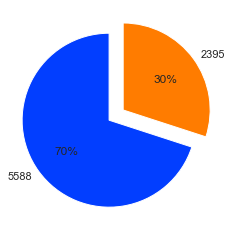

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
#define data
data = [X_train.shape[0],X_test.shape[0] ]
labels = [data[0], data[1]]
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:2]
#create pie chart
plt.pie(data, labels = labels, colors = colors,startangle=90, 
        autopct='%1.f%%',explode=(0.1,0.1))
plt.show()

In [5]:
metrics = { 'mse': "neg_mean_squared_error",
           'mae': "neg_mean_absolute_error",
           "r2" : "r2"
         }
n_cv = 10

### Predicting intervals with Random Forest Regressor

<https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html>

#### train with cross-validation

<https://scikit-learn.org/stable/modules/cross_validation.html>

Mean test R2 of the training with cross validation: 0.455 (0.033)
Mean test MSE of the training with cross validation: -659.974 (57.636)
Mean test MAE of the training with cross validation: -19.330 (0.521)


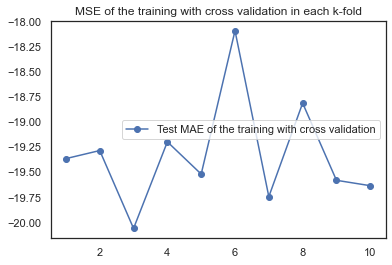

In [6]:
regr = RandomForestRegressor(n_jobs=-1,
                             n_estimators=500,
                             max_depth=6,
                             min_samples_leaf=0.01,
                             min_samples_split=0.01,
                            )
scores = train_metrics(X = X_train,y = y_train,n_cv=n_cv, metrics = metrics, model = regr)

#### train and report test metrics

1.0
The mean squared error (MSE) on test set: 648.9932
The mean absolute error (MAE) on test set: 19.2295
count    2395.000000
mean       19.229509
std        16.713344
min         0.002672
25%         7.760968
50%        15.385371
75%        26.222548
max       139.788083
Name: total_minutes, dtype: float64


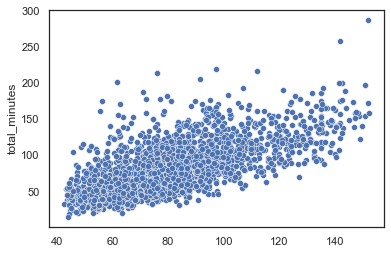

In [7]:
model,y_pred, error = show_test_metrics(X_train,y_train,y_test,model = regr)

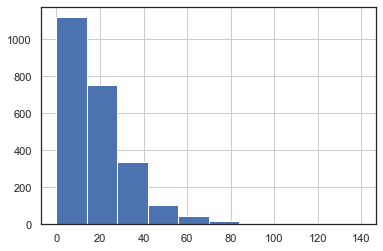

In [8]:
error.hist();

### Predicting intervals with Gradient Boosting Regression

Using GBR to predict intervals on 5%, 50% and 95%

<https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_quantile.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-quantile-py>

<https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor>

#### train with cross-validation

<https://scikit-learn.org/stable/modules/cross_validation.html>

Mean test R2 of the training with cross validation: 0.496 (0.037)
Mean test MSE of the training with cross validation: -610.030 (53.110)
Mean test MAE of the training with cross validation: -17.845 (0.462)


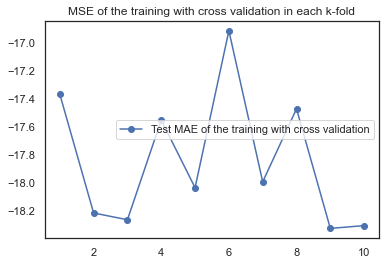

In [9]:
gbr_params = dict(
    learning_rate=0.1,
    n_estimators=150,
    max_depth=2,
    min_samples_leaf=0.01,
    min_samples_split=0.01,
)
gbr  = GradientBoostingRegressor(loss="quantile", alpha=0.5 , **gbr_params)
scores = train_metrics(X = X_train,y = y_train,n_cv=n_cv, metrics = metrics, model = gbr)

#### Train model and predict on the test data to report metrics

0.8739039665970773
The mean squared error (MSE) on test set: 601.9429
The mean absolute error (MAE) on test set: 17.8439


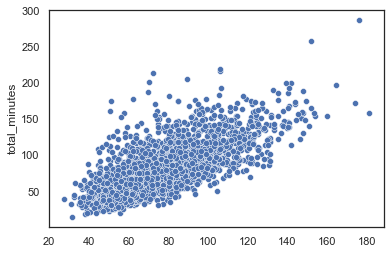

In [10]:
all_models = {}
for alpha in [0.05, 0.5, 0.95]:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **gbr_params)
    all_models["q %1.2f" % alpha] = gbr.fit(X_train, y_train)
y_lower = all_models["q 0.05"].predict(X_test)
y_upper = all_models["q 0.95"].predict(X_test)
y_med = all_models["q 0.50"].predict(X_test)
print(sum((y_upper>=y_test) & (y_lower<=y_test))/ len(y_test))
mse = mean_squared_error(y_test,y_med )
mae = mean_absolute_error(y_test, y_med)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
sns.scatterplot(y=y_test, x=y_med,legend=True);

count    2395.000000
mean       17.843866
std        16.842143
min         0.018051
25%         6.282465
50%        13.579451
75%        23.951286
max       141.467082
Name: total_minutes, dtype: float64


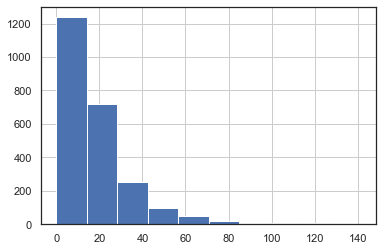

In [11]:
error = abs(y_med-y_test)
print(error.describe())
error.hist();

### Scikit-Learn Interface for XGboost

Using the cost functions mae and mse  from scikit-learn out of the box

<https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html>

<https://machinelearningmastery.com/xgboost-for-regression/>

#### train model with cross-validation

Mean test R2 of the training with cross validation: 0.517 (0.038)
Mean test MSE of the training with cross validation: -584.000 (47.202)
Mean test MAE of the training with cross validation: -18.033 (0.465)


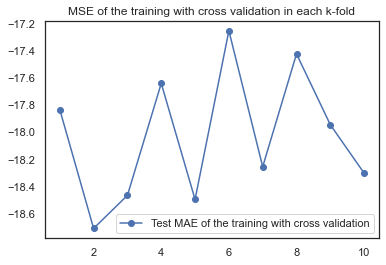

In [12]:
reg = XGBRegressor(
    tree_method="hist",
    eval_metric=mean_absolute_error,
    learning_rate=0.1,
    n_estimators=150,
    max_depth=2,
)

scores = train_metrics(X = X_train,y = y_train,n_cv=10, metrics = metrics, model = reg)

#### Train model and predict on the test data to report metrics

0.8830529616933881
The mean squared error (MSE) on test set: 578.7637
The mean absolute error (MAE) on test set: 18.0000
count    2395.000000
mean       18.000045
std        15.964603
min         0.001136
25%         6.600708
50%        13.888701
75%        24.995681
max       139.104166
Name: total_minutes, dtype: float64


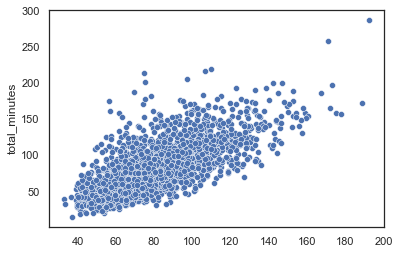

In [13]:
model,y_pred, error = show_test_metrics(X_train,y_train,y_test,model = reg)

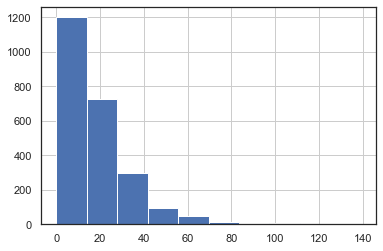

In [14]:
error.hist();

### Suppor vector Regression using non-linear Kernels

<https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html>

#### Train with cross-validation

Mean test R2 of the training with cross validation: 0.447 (0.039)
Mean test MSE of the training with cross validation: -668.178 (49.807)
Mean test MAE of the training with cross validation: -18.987 (0.256)


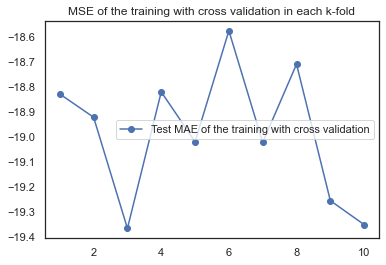

In [15]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
scores_rbf = train_metrics(X = X_train,y = y_train,n_cv=10, metrics = metrics, model = svr_rbf)

#### Train model and predict on the test data to report metrics

0.7461754355017345
The mean squared error (MSE) on test set: 654.2300
The mean absolute error (MAE) on test set: 18.7598
count    2395.000000
mean       18.759810
std        17.390394
min         0.000640
25%         6.249891
50%        14.316880
75%        25.413518
max       140.691102
Name: total_minutes, dtype: float64


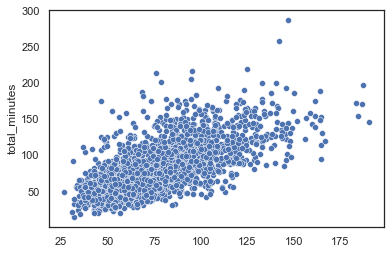

In [16]:
model,y_pred, error = show_test_metrics(X_train,y_train,y_test,model = svr_rbf)

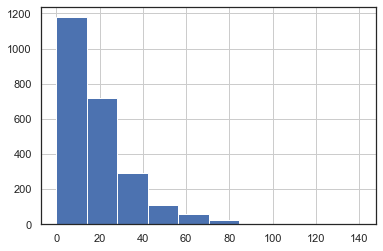

In [17]:
error.hist();